# ANOVA Workshop

## Unbalanced ANOVA Models

## Unequal Variance

Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.

Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'



Generalized least squares fit by REML
  Model: mpg ~ origin 
  Data: mtcars 
       AIC      BIC    logLik
  192.4491 200.6529 -90.22457

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | origin 
 Parameter estimates:
    Japan       USA    Europe 
1.0000000 0.6171796 0.9122182 

Coefficients:
                Value Std.Error   t-value p-value
(Intercept) 21.807143  1.498187 14.555685  0.0000
originJapan  3.752857  3.130032  1.198984  0.2402
originUSA   -5.668681  1.830585 -3.096649  0.0043

 Correlation: 
            (Intr) orgnJp
originJapan -0.479       
originUSA   -0.818  0.392

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.5130471 -0.7420504 -0.2078919  0.7578757  1.8896570 

Residual standard error: 6.145135 
Degrees of freedom: 32 total; 29 residual
Analysis of Deviance Table (Type II tests)

Response: mpg
       Df  Chisq Pr(>Chisq)    
origin  2 16.462  0.0002663 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘*

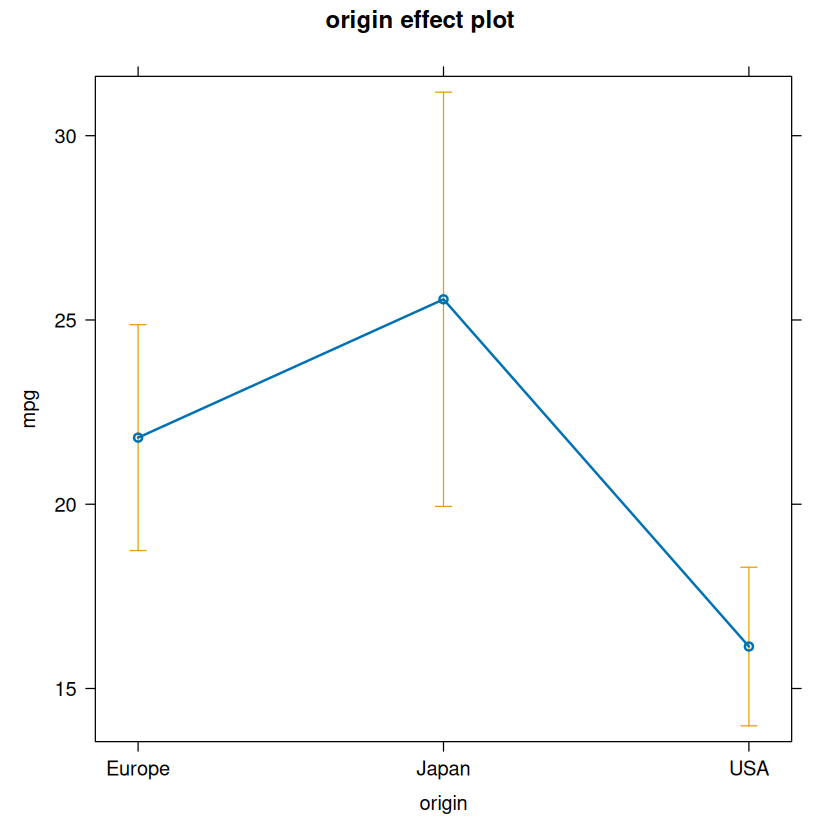

In [1]:
library(nlme)
library(car)
library(effects)
library(emmeans)

data(mtcars)
mtcars$origin <- c('Japan','Japan','USA','USA','USA','USA','USA','Europe','Europe',
                   'Europe','Europe','Europe','Europe','Europe','USA','USA','USA',
                   'Europe','Japan','Japan','Japan','USA','USA','USA','USA',
                   'Europe','Europe','Europe','USA','Europe','Europe','Europe')

# Step 1 - convert categorical predictors
mtcars$origin <- as.factor(mtcars$origin)

# Step 2 - fit the model (GLS assuming heterogeneity of variance)
origin.gls.mod <- gls(mpg ~ origin, data=mtcars, weights=varIdent(form = ~1|origin))
print(summary(origin.gls.mod))

# Step 3 - generate the ANOVA table
anova.tbl <- Anova(origin.gls.mod)
print(anova.tbl)

# Step 4 - generate follow-up tests
follow.up <- emmeans(origin.gls.mod, specs=pairwise ~ origin, adjust='holm')
print(follow.up$contrasts)
print(confint(follow.up$contrasts))

# Step 5 - extract and plot effects
effs <- allEffects(origin.gls.mod)
plot(effs)